In [2]:
# set path
rootdir = '/Users/rj/'
import os,sys
# append the path where your scripts are
sys.path.append(rootdir+"soft/python/") 
# import your own packages
from universal import *
plot_conf()

workdir = rootdir + 'Fellow-CERN/SAD/SuperKEKB/BG/newtail/master/'
os.chdir(workdir)
import random as rand

In [6]:
E0 = 0.511e6
Ek = 4e9-E0
gamma = (E0+Ek)/E0 # LAB
beta = sqrt(1-1/gamma**2) # LAB
re = 2.818e-15 # classic eletron radius
dp_min = 1e-2 # min. acceptance angle
c0 = 2.9979e8 #

In [7]:
# beta of COM frame
def beta_m(th):
    tt = sqrt(beta**2*gamma**2*th**2 / (1 + beta**2*gamma**2*th**2) )
    return tt 
# 
def rt(th): # gamma_t, 
    tt = sqrt(gamma**2/(1+beta**2*gamma**2*th**2))
    return tt
def cs_lab(th):
    beta_m = sqrt(beta**2*gamma**2*th**2/(1+beta**2*gamma**2*th**2))
    rt = sqrt(gamma**2/(1+beta**2*gamma**2*th**2))
    tt = np.pi*re**2*rt/(2*gamma**2)*((3-2/beta_m**2-1/beta_m**4)*log(rt*th/dp_min) + (1+1/beta_m**2)**2*(rt**2*th**2-dp_min**2)/dp_min**2 + 1 - dp_min/(rt*th))
    tt = tt/rt
    return tt

In [110]:
# Cross section
Xmin = sqrt(dp_min**2/gamma**2/(1-beta**2*dp_min**2))
# dp_min/(sqrt(gamma**2/(1+beta**2*gamma**2*x**2))*x)
# np.pi*re**2*sqrt(gamma**2/(1+beta**2*gamma**2*x**2))/(2*gamma**2)*((3 - 2/(beta**2*gamma**2*x**2/(1 + beta**2*gamma**2*x**2)) - 1/(beta**2*gamma**2*x**2/(1 + beta**2*gamma**2*x**2))**2)*log(sqrt(gamma**2/(1+beta**2*gamma**2*x**2))*x/dp_min) + (1+1/(beta**2*gamma**2*x**2/(1+beta**2*gamma**2*x**2)))**2*((gamma**2/(1+beta**2*gamma**2*x**2))*x**2-dp_min**2)/dp_min**2 + 1 - dp_min/(sqrt(gamma**2/(1+beta**2*gamma**2*x**2))*x))

cross_section = quad(lambda x: np.pi*re**2*sqrt(gamma**2/(1+beta**2*gamma**2*x**2))/(2*gamma**2)*((3 - 2/(beta**2*gamma**2*x**2/(1 + beta**2*gamma**2*x**2)) - 1/(beta**2*gamma**2*x**2/(1 + beta**2*gamma**2*x**2))**2)*log(sqrt(gamma**2/(1+beta**2*gamma**2*x**2))*x/dp_min) + (1+1/(beta**2*gamma**2*x**2/(1+beta**2*gamma**2*x**2)))**2*((gamma**2/(1+beta**2*gamma**2*x**2))*x**2-dp_min**2)/dp_min**2 + 1 - dp_min/(sqrt(gamma**2/(1+beta**2*gamma**2*x**2))*x))*sin(x), Xmin, 1/gamma)
print('Tous. cross section: %12.2e'%cross_section[0])

Tous. cross section:     3.81e-35


In [111]:
# probability of Tous. scattering with respect to max of x
prob_list = []
for upper in arange(1/gamma, 1, 1e-3):
    prob = quad(lambda x: np.pi*re*re*sqrt(gamma*gamma/(1 + beta * beta * gamma * gamma * x * x))/(2*gamma*gamma)*((3 - 2/(beta * beta * gamma * gamma * x * x/(1 + beta * beta * gamma * gamma * x * x)) - 1/pow(beta * beta * gamma * gamma * x * x/(1 + beta * beta * gamma * gamma * x * x), 2)) * log( sqrt(gamma*gamma/(1 + beta * beta * gamma * gamma * x * x)) * x/dp_min) + pow(1 + (1 + beta * beta * gamma * gamma * x * x)/(beta * beta * gamma * gamma * x *x), 2) * ((gamma * gamma / ( 1 + beta * beta * gamma * gamma * x * x)) * x * x - dp_min * dp_min)/(dp_min * dp_min) + 1 - dp_min/(sqrt(gamma * gamma/(1 + beta * beta * gamma * gamma * x * x)) * x))*sin(x), Xmin, upper)
    prob_list = np.append(prob_list, prob[0])

uplim = arange(1/gamma, 1, 1e-3)

In [112]:
fig = plt.figure()
plt.plot(uplim, prob_list)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Max. of $\chi$ [rad]')
plt.ylabel(r'Integared cross section [s$^{-1}$]')

plt.tight_layout()
plt.show()
fig.savefig('IntegratedCrossSection_MaxChi.pdf')

In [116]:
Xmin = sqrt(dp_min**2/gamma**2/(1-beta**2*dp_min**2))

X = []
sigma_lab = []
for i in logspace(log10(Xmin), -3, 200):
    X = np.append(X, i)
    sigma_lab = np.append(sigma_lab, cs_lab(i))
    
fig, ax = subplots(1, 1)
ax.plot(X*1e3, sigma_lab*1e29,'b-', label = 'Fitting')
ax.set_xlabel(r'$\chi$ [mrad]', fontdict=font)
# ax.set_ylabel(r'Cross section [s$^{-1}$]', fontdict=font)
ax.set_ylabel(r'$\sigma$ [$10^{-29}$ s$^{-1}$]', fontdict=font)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1e-3, 1.1)
# ax.set_ylim(-0.2, 8.1)
# ax.legend(loc = 'best', fontsize=16, labelspacing=0.15, frameon=False)
# ax.text(120, 20, r'$\tau_s$=%.1f ms'%(taus*1e3), fontdict=font)

fig.tight_layout()
plt.show()
fig.savefig('CrossSection_Chi_Lab.pdf')

In [38]:
# Total Touschek scattering probability (cross section)
X = []
sigma_lab = []
for i in linspace(Xmin, 1e-3, 1e4):
    X = np.append(X, i)
    sigma_lab = np.append(sigma_lab, cs_lab(i))
    
sigma_total = sum(sigma_lab)*(X[1]-X[0])
print(sigma_total)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


1.15853841212e-30


In [39]:
# Cross section by Le Duff
beta_com = 2*sqrt(1.2e-9/4)*beta*gamma
u = dp_min
sc_Le = 8*pi*re**2/beta**4*(1/u**2-1+log(u))/(gamma)**2/beta_com**4
print(sc_Le)

5.10953528742e-27


In [8]:
# Hardly to perform integration of F, alternatively, we estimate it by 
# function to be integrated
def F_fun(t, tm, B1, B2):
    zz = (((2+1/t)**2 *(t/tm/(1+t) -1) + 1 - sqrt(1+t)/sqrt(t/tm) - 1/(2*t)*(4 + 1/t)*log(t/tm/(1+t))) *exp(-B1*t)* special.i0(B2*t) * sqrt(t)/sqrt(1-t))
    return zz

In [41]:
# Test Piwinski formulas at IP of ATF DR lattice
# F in Piwinski Touschek lifetime formula
Ne = 2.7e10 # e/pulse

alfx = -4.436
betx = 5.25
alfy = 1.30
bety = 1.72
etax = 0.12
etapx = 0.1
etay = -0.006
etapy = 0.0047

sigmas = 5.6e-3 # m
sigmap = 6e-4 #
emitx = 1.2e-9
emity = 1.2e-11

sigmax_b = sqrt(emitx*betx)
sigmax = sqrt(emitx*betx + etax**2*sigmap**2)
etax2 = alfx*etax + betx*etapx

sigmay_b = sqrt(emity*bety)
sigmay = sqrt(emity*bety + etay**2*sigmap**2)
etay2 = alfy*etay + bety*etapy

sigmax2 = sqrt(emitx*betx + sigmap**2*(etax**2 + etax2**2)) # sigmax'
sigmay2 = sqrt(emity*bety + sigmap**2*(etay**2 + etay2**2))

sigmah = 1/sqrt(1/(sigmap**2 * sigmax_b**2 * sigmay_b**2) * (sigmax2**2 *sigmay_b**2 + sigmay2**2 *sigmax_b**2 - sigmax_b**2 *sigmay_b**2))
B1 = betx**2/(2*beta**2 *gamma**2 *sigmax_b**2) * (1 - sigmah**2*etax2**2/sigmax_b**2) + bety**2/(2*beta**2 *gamma**2 *sigmay_b**2) * (1 - sigmah**2 *etay2**2/sigmay_b**2)
B2 = sqrt( B1**2 - betx**2 * bety**2 *sigmah**2/(beta**4 * gamma**4 * sigmax_b**4 * sigmay_b**4 * sigmap**2)*(sigmax**2 *sigmay**2 - sigmap**4 *etax**2 *etay**2))
tm = (beta*dp_min)**2

'''
quad(lambda t: (((2+1/t)**2 *(t/tm/(1+t) -1) + 1 - sqrt(1+t)/sqrt(t/tm) - 1/(2*t)*(4 + 1/t)*log(t/tm/(1+t))) *exp(-B1*t)* special.i0(B2*t) * sqrt(t)/sqrt(1-t)) , tm, 10*tm)

# vm = np.arctan(sqrt(tm))
# quad(lambda v: (((2*tan(v)**2 +1)**2 *(tan(v)**2/tm/(1+tan(v)**2) -1) + tan(v)**2 - sqrt(1+tan(v)**2)*sqrt(tan(v)**2/tm) - (2 + 1/2/tan(v)**2)*log(tan(v)**2/tm/(1+tan(v)**2))) *exp(-B1*tan(v)**2)* special.i0(B2*tan(v)**2) * sqrt(1+tan(v)**2)) , vm, vm*2)
'''

# 1000 bins, bin width = 0.5 tm
tt = []
ss = 0
# bin width as tm/2
for i in arange(500):
    zz = F_fun(tm+i*tm/2, tm, B1, B2)
    tt = np.append(tt, zz)
    ss += zz*tm/2


F=sqrt(pi*(B1**2 -B2**2)) *tm *ss

alpha = re**2*c0*Ne/(8*pi*gamma**2*sigmas*sqrt(sigmax**2*sigmay**2 - sigmap**4*etax**2*etay**2)*tm)*F

#local Touschek lifetime
1/alpha/60

4.007574427711404

In [14]:
special.i0(10)

2815.716628466254

In [13]:
# pos	 betx	 alfx	 mux	 bety	 alfy	 muy	 dpx	 dppx	 dpy	 dppy
# ATF shorten lattice (250 elements) with the full circumference
# ATF unshorten lattice (887 elements) with the full circumference

dat0 = loadtxt('Twiss_LER.dat', usecols=[1, 3, 4, 5, 6, 7, 8, 9, 10])
# dat0 = loadtxt('Twiss_short1_tous_realCOD.dat')
# dat0 = loadtxt('Twiss_short1_tous_realCOD_coup.dat')
s, betx0, alfx0, bety0, alfy0, etax0, etapx0, etay0, etapy0 = transpose(dat0)

dp_min = 1e-2 # min. acceptance angle
Ne = 2.7e10 # e/pulse
'''
# setting 1
sigmas = 5.31e-3 # m
sigmap = 5.62e-4 #
emitx = 1.066e-9
emity = 1.142e-11
'''

# setting2, with IBS
sigmas = 4.75E-3
sigmap = 7.5E-4
emitx = 1.63e-9
emity = 1.81e-11
cir = 3016.31 # m

TousAccum = 0
for i in range(len(s)-1):   
# for i in range(184, 185):       
    # Twiss parameters
    alfx = alfx0[i]
    betx = betx0[i]
    alfy = alfy0[i]
    bety = bety0[i]
    etax = etax0[i]
    etapx = etapx0[i]
    etay = etay0[i]
    etapy = etapy0[i]

    # beam dimensions
    sigmax_b = sqrt(emitx*betx)
    sigmax = sqrt(emitx*betx + etax**2*sigmap**2)
    etax2 = alfx*etax + betx*etapx

    sigmay_b = sqrt(emity*bety)
    sigmay = sqrt(emity*bety + etay**2*sigmap**2)
    etay2 = alfy*etay + bety*etapy

    sigmax2 = sqrt(emitx*betx + sigmap**2*(etax**2 + etax2**2)) # sigmax'
    sigmay2 = sqrt(emity*bety + sigmap**2*(etay**2 + etay2**2))

    sigmah = 1/sqrt(1/(sigmap**2 * sigmax_b**2 * sigmay_b**2) * (sigmax2**2 *sigmay_b**2 + sigmay2**2 *sigmax_b**2 - sigmax_b**2 *sigmay_b**2))
    B1 = betx**2/(2*beta**2 *gamma**2 *sigmax_b**2) * (1 - sigmah**2*etax2**2/sigmax_b**2) + bety**2/(2*beta**2 *gamma**2 *sigmay_b**2) * (1 - sigmah**2 *etay2**2/sigmay_b**2)
    B2 = sqrt( B1**2 - betx**2 * bety**2 *sigmah**2/(beta**4 * gamma**4 * sigmax_b**4 * sigmay_b**4 * sigmap**2)*(sigmax**2 *sigmay**2 - sigmap**4 *etax**2 *etay**2))
    tm = (beta*dp_min)**2

    # F factor
    # 1000 bins, bin width = 0.5 tm
    tt = []
    ss = 0
    # bin width as tm/2
    for j in arange(800):
        zz = F_fun(tm + j*tm/4, tm, B1, B2)
        # print(zz)
        # to avoid "" error
        if (zz == inf or abs(zz)<1e-6):
            break
        tt = np.append(tt, zz)
        ss += zz*tm/4

    F=sqrt(pi*(B1**2 -B2**2)) *tm *ss

    # local Touschek lifetime
    alpha = re**2*c0*Ne/(8*pi*gamma**2*sigmas*sqrt(sigmax**2*sigmay**2 - sigmap**4*etax**2*etay**2)*tm)*F
    locals()['Tousi_{0}'.format(i)] = 1/alpha
    # print('Tous_%d = %.2f s'%(i, 1/alpha))
    TousAccum += 1/alpha*(s[i+1] - s[i])

print('dp_min = %.2e\tTouscheck lifetime is %.2f'%(dp_min, TousAccum/cir))    

dp_min = 1.00e-02	Touscheck lifetime is 2709.42


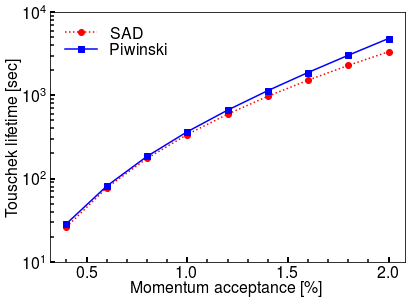

In [76]:
dp_acc = array([0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.0])
# paramters w. IBS
tous_piwinski = array([28.70, 81.31, 184.48, 364.88, 662.55, 1136.72, 1877.65, 3026.19, 4807.17])
tous_sad = array([26.13925,  77.58340,  174.7260,  337.8155,  592.7478, 972.5080,  1518.858,  2284.330,  3334.60])

fig = plt.figure()
plt.plot(dp_acc, tous_sad, 'o:', label = 'SAD')
plt.plot(dp_acc, tous_piwinski, 's-', label = 'Piwinski')
plt.xlabel('Momentum acceptance [\%]')
plt.ylabel(r'Touschek lifetime [sec]')
plt.yscale('log')
plt.ylim(1e1, 1e4)

plt.legend(loc = 'best', frameon=False)
fig.tight_layout()
plt.show()
fig.savefig('TouschekLifetime_ATF_3e9_sadpiwinski.pdf')
# notes: in fact, SAD and Py results are with diff. COD, but the difference/infuence is not considerable!

In [1]:
750*12.5e-2

93.75